In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [8]:
dataset = pd.read_csv("pima_diabetes.csv")
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


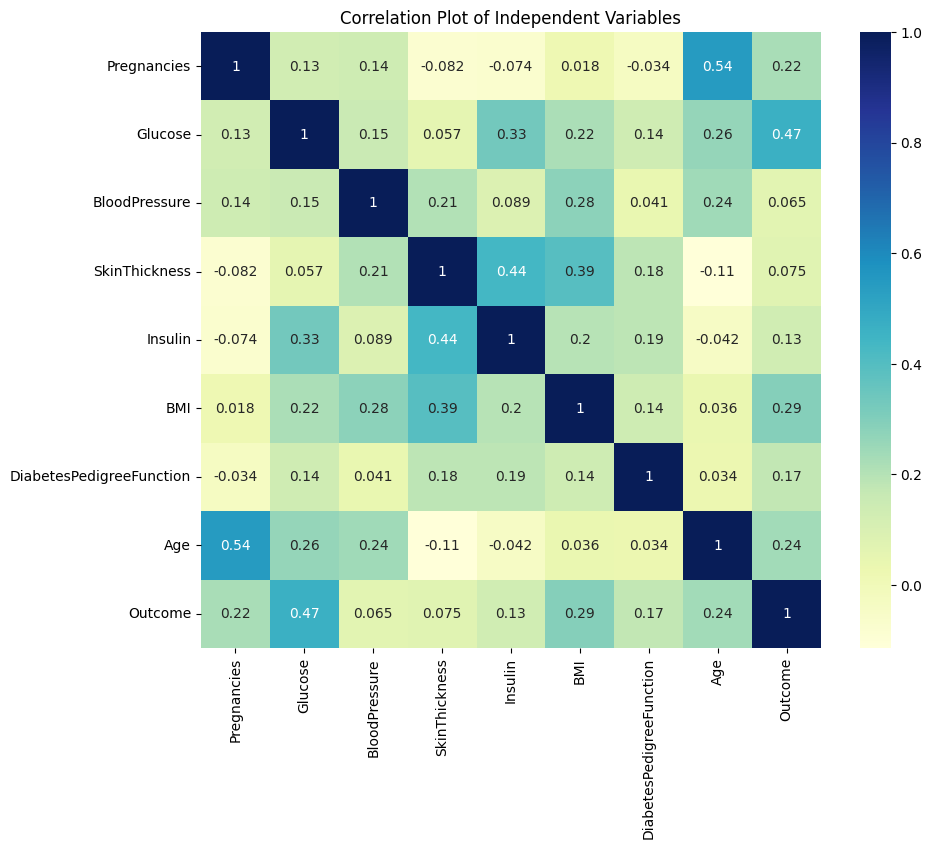

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Plot of Independent Variables")
plt.show()


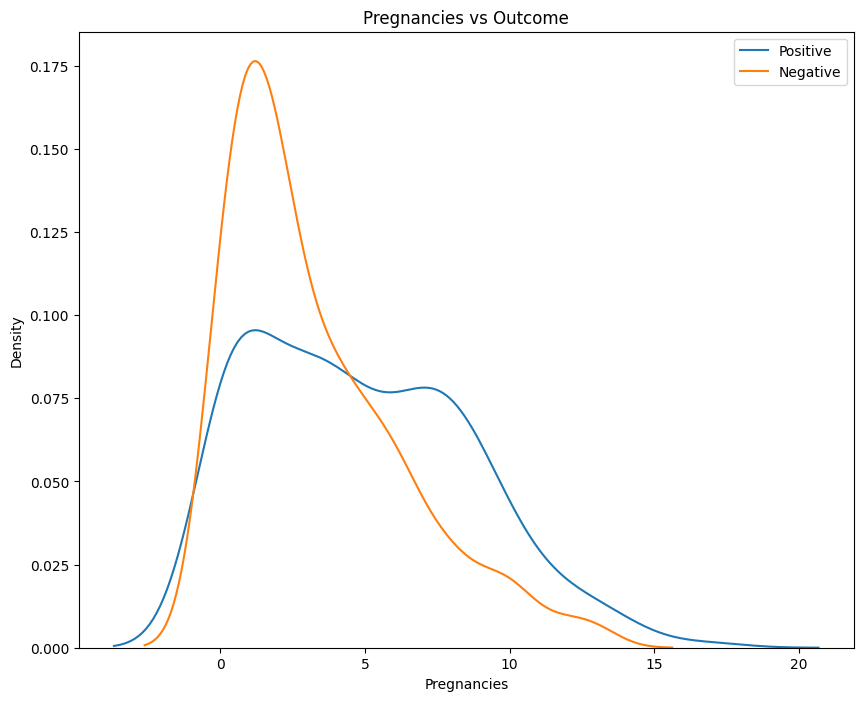

In [13]:
plt.figure(figsize=(10,8))
sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], label="Positive")
sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], label="Negative")
plt.legend()
plt.title("Pregnancies vs Outcome")
plt.show()


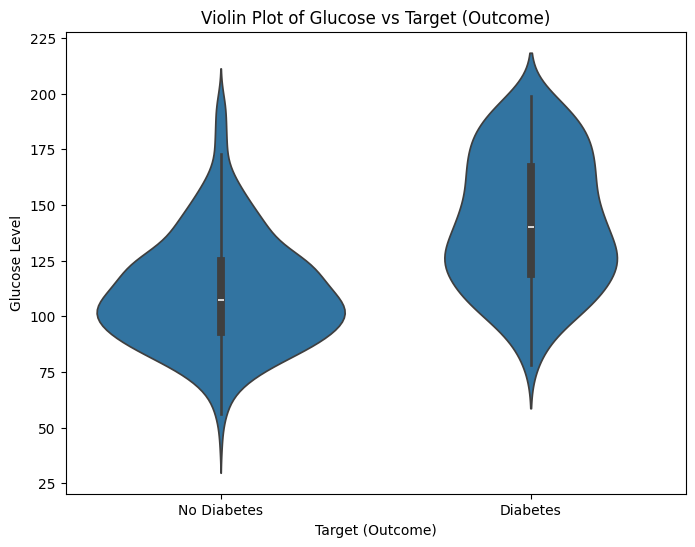

In [26]:
plt.figure(figsize=(8,6))
sns.violinplot(
    x="Outcome",
    y="Glucose",
    data=dataset
)
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.xlabel("Target (Outcome)")
plt.ylabel("Glucose Level")
plt.title("Violin Plot of Glucose vs Target (Outcome)")
plt.show()


In [15]:
columns_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_with_zero:
    dataset[col] = dataset[col].replace(0, dataset[col].mean())


C:\Users\KAMALESH\AppData\Local\Temp\ipykernel_9732\86697523.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\KAMALESH\AppData\Local\Temp\ipykernel_9732\86697523.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


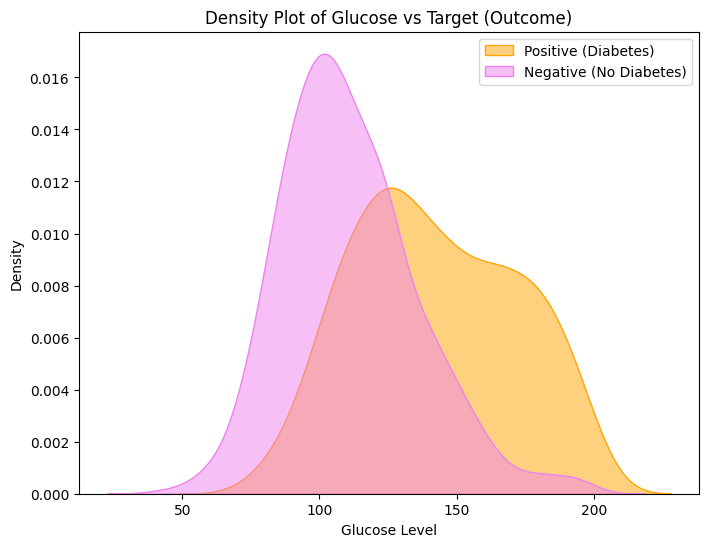

In [27]:
plt.figure(figsize=(8,6))

sns.kdeplot(
    dataset[dataset["Outcome"] == 1]["Glucose"],
    shade=True,
    color="orange",
    alpha=0.5,
    label="Positive (Diabetes)"
)

sns.kdeplot(
    dataset[dataset["Outcome"] == 0]["Glucose"],
    shade=True,
    color="violet",
    alpha=0.5,
    label="Negative (No Diabetes)"
)

plt.xlabel("Glucose Level")
plt.ylabel("Density")
plt.title("Density Plot of Glucose vs Target (Outcome)")
plt.legend()
plt.show()


In [28]:
X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]

X.head(), y.head()


(   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
 0            6    148.0           72.0      35.000000   79.799479  33.6   
 1            1     85.0           66.0      29.000000   79.799479  26.6   
 2            8    183.0           64.0      20.536458   79.799479  23.3   
 3            1     89.0           66.0      23.000000   94.000000  28.1   
 4            0    137.0           40.0      35.000000  168.000000  43.1   
 
    DiabetesPedigreeFunction  Age  
 0                     0.627   50  
 1                     0.351   31  
 2                     0.672   32  
 3                     0.167   21  
 4                     2.288   33  ,
 0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


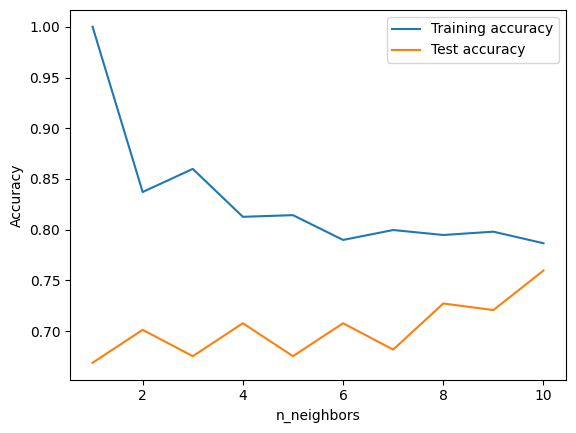

In [18]:
train_accuracy = []
test_accuracy = []

neighbors = range(1, 11)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors, train_accuracy, label="Training accuracy")
plt.plot(neighbors, test_accuracy, label="Test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [19]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train), ": Training accuracy")
print(knn.score(X_test, y_test), ": Test accuracy")


0.7980456026058632 : Training accuracy
0.7207792207792207 : Test accuracy


In [20]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train), ": Training accuracy")
print(dt.score(X_test, y_test), ": Test accuracy")


1.0 : Training accuracy
0.7012987012987013 : Test accuracy


In [21]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=6)
dt1.fit(X_train, y_train)

print(dt1.score(X_train, y_train), ": Training accuracy")
print(dt1.score(X_test, y_test), ": Test accuracy")


0.8680781758957655 : Training accuracy
0.7467532467532467 : Test accuracy


In [22]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print(mlp.score(X_train, y_train), ": Training accuracy")
print(mlp.score(X_test, y_test), ": Test accuracy")


0.7117263843648208 : Training accuracy
0.6428571428571429 : Test accuracy


In [23]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [24]:
mlp1 = MLPClassifier(random_state=0)
mlp1.fit(X_train_scaled, y_train)

print(mlp1.score(X_train_scaled, y_train), ": Training accuracy")
print(mlp1.score(X_test_scaled, y_test), ": Test accuracy")


0.8143322475570033 : Training accuracy
0.7662337662337663 : Test accuracy


C:\Users\KAMALESH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
